<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#### Load the first dataset and check the first two observations

In [2]:
# load your data
df = pd.read_csv('winequality-white.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# check data types of variables
# type your code here
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

0       0.27
1       0.30
2       0.28
3       0.23
4       0.23
        ... 
4893    0.21
4894    0.32
4895    0.24
4896    0.29
4897    0.21
Name: volatile acidity, Length: 4898, dtype: float64

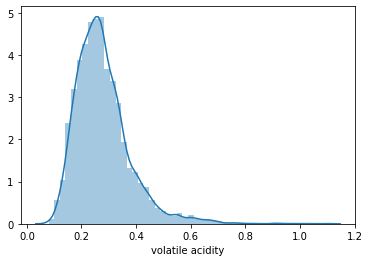

In [4]:
# type your code here
sns.distplot(df['volatile acidity'])
df['volatile acidity']

In [5]:
df['volatile acidity'].skew()
#apply transformation
box_cox_vol_acid,lam = stats.boxcox(df['volatile acidity'])
df['volatile acidity'] = box_cox_vol_acid
df['volatile acidity'].skew()

-0.005002834640604854

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df['residual sugar'].skew()
box_cox_resid_sugar,lam = stats.boxcox(df['residual sugar'])
df['residual sugar'] = box_cox_resid_sugar
df['residual sugar'].skew()

-0.05191708569501423

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
df.var()  

fixed acidity              0.712114
volatile acidity           0.156868
citric acid                0.014646
residual sugar             1.217180
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64

as variance value of chlorides and density tends to zero, sowe can say thesefeatures adds little to no information.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df['alcohol'].skew()
box_cox_alcohol,lam = stats.boxcox(df['alcohol'])
df['alcohol'] = box_cox_alcohol
df['alcohol'].skew()

0.059296099414978855

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
import statsmodels.api as sm

In [10]:
# type your code here
# build a model without scalling
# build the model with scaled ph
# df['pH'].values.reshape(-1,1)
inp = df.drop('quality',axis = 1)
out = df['quality']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     165.7
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:16:43   Log-Likelihood:                -5578.3
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4886   BIC:                         1.126e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.5833     15.572      2.542      0.011       9.054      70.112
fixed acidity            0.0045      0.018      0.253      0.800      -0.031       0.040
volatile acidity        -0.4896      0.029    -16.831      0.000      -0.547      -0.433
citric acid              0.1213      0.096      1.264      0.206      -0.067       0.309
residual sugar           0.2700      0.022     12.534      0.000       0.228       0.312
chlorides               -0.9377      0.544     -1.724      0.085      -2.004       0.128
free sulfur dioxide      0.0041      0.001      4.859      0.000       0.002       0.006
total sulfur dioxide    -0.0007      0.000     -1.870      0.062      -0.001    3.43e-05
density                -90.5143     12.123     -7.466      0.000    -114.282     -66.747
pH                       0.3835      0.093      4.133      0.000       0.202       0.565
sulphates                0.5458      0.099      5.499      0.000       0.351       0.740
alcohol                 81.8471      6.697     12.221      0.000      68.717      94.977
==============================================================================
Omnibus:                      128.197   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.331
Skew:                           0.114   Prob(JB):                     1.81e-62
Kurtosis:                       4.158   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ph = sc.fit_transform(df['pH'].values.reshape(-1,1))
df['scaled pH'] = ph

In [12]:
inp = df.drop(['quality','pH'],axis = 1)
out = df['quality']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     165.7
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:16:44   Log-Likelihood:                -5578.3
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4886   BIC:                         1.126e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.8060     15.704      2.598      0.009      10.019      71.593
fixed acidity            0.0045      0.018      0.253      0.800      -0.031       0.040
volatile acidity        -0.4896      0.029    -16.831      0.000      -0.547      -0.433
citric acid              0.1213      0.096      1.264      0.206      -0.067       0.309
residual sugar           0.2700      0.022     12.534      0.000       0.228       0.312
chlorides               -0.9377      0.544     -1.724      0.085      -2.004       0.128
free sulfur dioxide      0.0041      0.001      4.859      0.000       0.002       0.006
total sulfur dioxide    -0.0007      0.000     -1.870      0.062      -0.001    3.43e-05
density                -90.5143     12.123     -7.466      0.000    -114.282     -66.747
sulphates                0.5458      0.099      5.499      0.000       0.351       0.740
alcohol                 81.8471      6.697     12.221      0.000      68.717      94.977
scaled pH                0.0579      0.014      4.133      0.000       0.030       0.085
==============================================================================
Omnibus:                      128.197   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.331
Skew:                           0.114   Prob(JB):                     1.81e-62
Kurtosis:                       4.158   Cond. No.                     2.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are getting same r2 value as 0.272 with and without scalling of 'pH'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
vif = pd.DataFrame()
inp = df.drop(['quality','scaled pH','density','alcohol','pH','fixed acidity','total sulfur dioxide'],1)
vif['VIF'] = [variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['Feature'] = inp.columns
vif.sort_values('VIF',ascending=True)
vif

,VIF,Feature
0,11.149590,volatile acidity
1,8.474799,citric acid
2,3.628418,residual sugar
3,5.123389,chlorides
4,5.995789,free sulfur dioxide
5,12.485904,sulphates


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
inp = df.drop(['quality','scaled pH'],axis = 1)
out = df['quality']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     165.7
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:16:44   Log-Likelihood:                -5578.3
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4886   BIC:                         1.126e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.5833     15.572      2.542      0.011       9.054      70.112
fixed acidity            0.0045      0.018      0.253      0.800      -0.031       0.040
volatile acidity        -0.4896      0.029    -16.831      0.000      -0.547      -0.433
citric acid              0.1213      0.096      1.264      0.206      -0.067       0.309
residual sugar           0.2700      0.022     12.534      0.000       0.228       0.312
chlorides               -0.9377      0.544     -1.724      0.085      -2.004       0.128
free sulfur dioxide      0.0041      0.001      4.859      0.000       0.002       0.006
total sulfur dioxide    -0.0007      0.000     -1.870      0.062      -0.001    3.43e-05
density                -90.5143     12.123     -7.466      0.000    -114.282     -66.747
pH                       0.3835      0.093      4.133      0.000       0.202       0.565
sulphates                0.5458      0.099      5.499      0.000       0.351       0.740
alcohol                 81.8471      6.697     12.221      0.000      68.717      94.977
==============================================================================
Omnibus:                      128.197   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.331
Skew:                           0.114   Prob(JB):                     1.81e-62
Kurtosis:                       4.158   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
print(ols_mod.resid.skew())
box_cox,lam = stats.boxcox(out)
ypred = ols_mod.predict()
resid = box_cox - ypred
residue = pd.DataFrame(resid,columns=['Residue'])
residue['Residue'].skew()

0.11450775615291087


-0.004959653465530494

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here
sc = StandardScaler()
ca = sc.fit_transform(df['citric acid'].values.reshape(-1,1))
df['scaled citric acid'] = ca

In [18]:
inp = df.drop(['quality','citric acid','scaled pH'],axis = 1)
out = df['quality']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     165.7
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:16:45   Log-Likelihood:                -5578.3
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4886   BIC:                         1.126e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.6238     15.575      2.544      0.011       9.090      70.157
fixed acidity            0.0045      0.018      0.253      0.800      -0.031       0.040
volatile acidity        -0.4896      0.029    -16.831      0.000      -0.547      -0.433
residual sugar           0.2700      0.022     12.534      0.000       0.228       0.312
chlorides               -0.9377      0.544     -1.724      0.085      -2.004       0.128
free sulfur dioxide      0.0041      0.001      4.859      0.000       0.002       0.006
total sulfur dioxide    -0.0007      0.000     -1.870      0.062      -0.001    3.43e-05
density                -90.5143     12.123     -7.466      0.000    -114.282     -66.747
pH                       0.3835      0.093      4.133      0.000       0.202       0.565
sulphates                0.5458      0.099      5.499      0.000       0.351       0.740
alcohol                 81.8471      6.697     12.221      0.000      68.717      94.977
scaled citric acid       0.0147      0.012      1.264      0.206      -0.008       0.037
==============================================================================
Omnibus:                      128.197   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.331
Skew:                           0.114   Prob(JB):                     1.81e-62
Kurtosis:                       4.158   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are getting same r2 value as 0.272 with and without scalling of 'citric acid'

In [19]:
df = df.drop(['scaled pH','scaled citric acid'],1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
inp = df.drop('quality',axis = 1)
out = df['quality']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     165.7
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:16:45   Log-Likelihood:                -5578.3
No. Observations:                4898   AIC:                         1.118e+04
Df Residuals:                    4886   BIC:                         1.126e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.5833     15.572      2.542      0.011       9.054      70.112
fixed acidity            0.0045      0.018      0.253      0.800      -0.031       0.040
volatile acidity        -0.4896      0.029    -16.831      0.000      -0.547      -0.433
citric acid              0.1213      0.096      1.264      0.206      -0.067       0.309
residual sugar           0.2700      0.022     12.534      0.000       0.228       0.312
chlorides               -0.9377      0.544     -1.724      0.085      -2.004       0.128
free sulfur dioxide      0.0041      0.001      4.859      0.000       0.002       0.006
total sulfur dioxide    -0.0007      0.000     -1.870      0.062      -0.001    3.43e-05
density                -90.5143     12.123     -7.466      0.000    -114.282     -66.747
pH                       0.3835      0.093      4.133      0.000       0.202       0.565
sulphates                0.5458      0.099      5.499      0.000       0.351       0.740
alcohol                 81.8471      6.697     12.221      0.000      68.717      94.977
==============================================================================
Omnibus:                      128.197   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.331
Skew:                           0.114   Prob(JB):                     1.81e-62
Kurtosis:                       4.158   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# type your code here
#linearity check
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(res = ols_mod,frac=0.5)

(1.071861064255137, 0.043210693092728104)

As p-value < 0.05 , the data is not linear.

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
forward = sfs(estimator=lr,k_features=5,forward=True,scoring='r2')
sfs_forward = forward.fit(inp,box_cox)
feat_forward = sfs_forward.k_feature_names_
feat_forward

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'alcohol')

In [24]:
sfs_forward.k_score_

0.23813977403401215

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here
backward = sfs(estimator=lr,k_features=5,forward=False,scoring='r2')
sfs_backward = backward.fit(inp,box_cox)
feat_back = sfs_backward.k_feature_names_
feat_back

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'alcohol')

In [26]:
sfs_backward.k_score_

0.23813977403401215

The R-squared value obtained from question 10 with the value obtained using backward elimination is same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
lr = LinearRegression()
forward = sfs(estimator=lr,k_features=(2,6),forward=True,scoring='r2')
sfs_forward = forward.fit(inp,box_cox)
feat_forward = sfs_forward.k_feature_names_
feat_forward

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'sulphates',
 'alcohol')

In [28]:
sfs_forward.k_score_

0.23908824662843847

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here
lr = LinearRegression()
forward = sfs(estimator=lr,k_features='best',forward=True,scoring='r2')
sfs_forward = forward.fit(inp,box_cox)
feat_forward = sfs_forward.k_feature_names_
feat_forward

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [30]:
sfs_forward.k_score_

0.2398078764740826

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
backward = sfs(estimator=lr,k_features='best',forward=False,scoring='r2')
sfs_backward = backward.fit(inp,box_cox)
feat_back = sfs_backward.k_feature_names_
feat_back

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [32]:
sfs_backward.k_score_

0.2398078764740826

The R-squared value obtained from question 13 with the value obtained using backward elimination is same.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
#RFE
from sklearn.feature_selection import RFECV

In [34]:
lr = LinearRegression()
rfe=RFECV(estimator=lr)
rfe_mod=rfe.fit(inp,box_cox)
rfe_mod.ranking_

array([4, 1, 2, 1, 1, 3, 5, 1, 1, 1, 1])

In [35]:
rank = pd.DataFrame()

In [36]:
rank['Features'] = inp.columns
rank['Rank'] = rfe_mod.ranking_
feat_rfe = rank[rank['Rank']==1]['Features']
feat_rfe

1     volatile acidity
3       residual sugar
4            chlorides
7              density
8                   pH
9            sulphates
10             alcohol
Name: Features, dtype: object

In [37]:
from sklearn.metrics import r2_score,mean_squared_error

In [38]:
feat_rfe = list(feat_rfe)
lr = LinearRegression()
lr_mod = lr.fit(inp[feat_rfe],box_cox)
ypred = lr.predict(inp[feat_rfe])
r2 = r2_score(box_cox,ypred)
rmse = np.sqrt(mean_squared_error(box_cox,ypred))
res_rfe = [r2,rmse]
res_rfe

[0.2672606147579917, 0.46582992025849906]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inp[list(feat_forward)],box_cox,test_size = 0.3,random_state = 48)

In [40]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)
mse_train = mean_squared_error(ytrain,ypred_train)
mse_test = mean_squared_error(ytest,ypred_test)
mse_train,mse_test

(0.21544367487453828, 0.21811720231837037)

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# type your code here
from sklearn.model_selection import cross_val_score

In [51]:
# type your code here
df['new pH'] = df['pH'].apply(lambda x : 'Acidic' if x<7 else 'Basic')
df['new pH'].value_counts()

Acidic    4898
Name: new pH, dtype: int64

In [ ]:
# As all the values are same so the variance is 0 and it is not a significant feature

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
inp = df.drop(['quality','new pH'],axis=1)
lr = LinearRegression()
mse = abs(cross_val_score(lr,inp,box_cox,cv=5,scoring='neg_mean_squared_error'))
np.std(mse)/np.mean(mse)

0.11948838155578988

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
lr = LinearRegression()
r2 = cross_val_score(lr,inp,box_cox,cv=5,scoring='r2')   
r2

array([0.17828003, 0.28325535, 0.26386507, 0.29795057, 0.15595562])

In [45]:
mse = abs(cross_val_score(lr,inp,box_cox,cv=5,scoring='neg_mean_squared_error'))
mse

array([0.27039755, 0.22796029, 0.22000334, 0.20585127, 0.19166943])

In [46]:
np.mean(mse)

0.2231763748728838

In [47]:
np.std(mse)

0.026666983835049136

In [48]:
np.std(mse)/np.mean(mse)   # 12% , some overfitting is there

0.11948838155578988

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# type your code here
